<a href="https://colab.research.google.com/github/Erick-Rodriguez01/IA/blob/main/PredictorDeFallasCardiacasIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Inteligencia Artificial.

Tema: Prediccion de falla cardiaca, el objetivo es determinar sí el paciente presentara una falla cardiaca en un periodo cercano.
Dataset utilizado: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Es un problema supervisado de clasificación, debido a que tenemos las caracterisiticas y las etiquetas y solo necesitamos que la inteligencia agrupe segun las caracteristicas ingresadas.


In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [89]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
print(df.head())
print(df.shape)


    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]
(299, 13)


In [90]:
#Asignamos los valores a nuestras variables X y Y
X = df[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"]].values
y = df['DEATH_EVENT'].values

#Separamos los valores en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777,test_size=0.4)
#print('Datos sin escalizar:',X_train)

#Hacemos el escalamiento de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #hacemos el entrenamiento y transformamos los datos
X_test = scaler.transform(X_test)
#print('Datos escalizados:',X_train)

print(X_train.shape)
print(X_test.shape)
print(y.shape)


(179, 12)
(120, 12)
(299,)


In [91]:
#log_reg=LogisticRegression()
#log_reg.fit(X_train,y_train)
clf = svm.LinearSVC(C=1, random_state=777).fit(X_train, y_train)
y_predic_svm = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_predic_svm)
tn, fp, fn, tp = confusion_matrix(y_test, y_predic_svm).ravel()
print('Matriz de confusión del modelo:\n', matrix)
accuracy = accuracy_score(y_test, y_predic_svm)
print('Accuracy del modelo:', accuracy)
f1_2 = f1_score(y_test,y_predic_svm, average='macro')
print('F1 modelo average macro:', f1_2)
MCC= matthews_corrcoef(y_test, y_predic_svm)
print('MCC del modelo:', MCC)

#acrcy=cross_val_score(estimator=log_reg,X=X_test,y=y_test,cv=10)
#print('Standard Deviation {:.2f}%'.format(acrcy.std()*100))


Matriz de confusión del modelo:
 [[79  9]
 [ 7 25]]
Accuracy del modelo: 0.8666666666666667
F1 modelo average macro: 0.8328108672936259
MCC del modelo: 0.6663200452381971


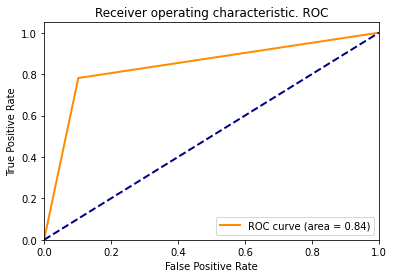

In [94]:
AUC=[]
AUC.append(roc_auc_score(y_test,y_predic_svm))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predic_svm, pos_label=1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_predic_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
from sklearn.metrics import classification_report

lr = 0.001           # learning rate
nn = [64, 32, 16, 2]  # número de neuronas por capa.
clf = MLPClassifier(solver="adam",random_state=1, max_iter=200,learning_rate='adaptive',learning_rate_init=0.001,verbose=True).fit(X_train,y_train)

# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[0], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 4
l4 = model.add(kr.layers.Dense(nn[3], activation='relu'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.

model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
entreno=model.fit(X,y, epochs=100)


#Cross Validation
EL resultado de cross validation con respecto a MCC es bastante bajo, por lo tanto se buscó otros modelos y se llego al siguiente resultado:

#RandomForest
Al variar parametros la ANN y no lograr obtener un accuracy alto ní un F1 bueno, se procedio a intentar con otro metodo como DecisionTree para buscar un resultado mejor.

Matriz de confusión del modelo:
 [[82  6]
 [ 6 26]]
Accuracy del modelo: 0.9
F1 modelo average macro: 0.8721590909090908
MCC del modelo: 0.7443181818181818


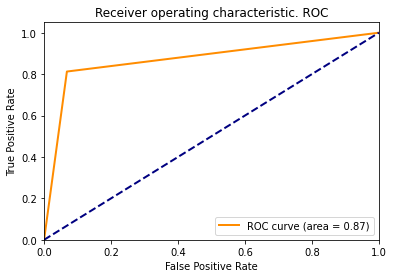

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, f1_score,matthews_corrcoef
from sklearn.decomposition import PCA

#DecisionTreeClassifier clasificador Gini 
clf_entropy = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state = 666)
            
#Entrenamos el modelo
clf_entropy = clf_entropy.fit(X_train, y_train)
#Predecimos
y_predic_entropy = clf_entropy.predict(X_test)

#Revisamos datos obtenidos 
matrix = confusion_matrix(y_test, y_predic_entropy)
tn, fp, fn, tp = confusion_matrix(y_test, y_predic_entropy).ravel()
print('Matriz de confusión del modelo:\n', matrix)
accuracy = accuracy_score(y_test, y_predic_entropy)
print('Accuracy del modelo:', accuracy)
f1_2 = f1_score(y_test,y_predic_entropy, average='macro')
print('F1 modelo average macro:', f1_2)
MCC= matthews_corrcoef(y_test, y_predic_entropy)
print('MCC del modelo:', MCC)

AUC=[]
AUC.append(roc_auc_score(y_test,y_predic_entropy))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predic_entropy, pos_label=1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_predic_Gini))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

#PCA
Probamos el mismo algoritmo pero con PCA

In [57]:
df.head()
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

X_cols= ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"]
df[X_cols] = scaler.fit_transform(df[X_cols])
df.head()

pca9 = PCA(n_components=11, random_state=42)
pca9_1= pca9
pca9 = pca9.fit_transform(df[X_cols])
pca9[:4]
df_9 = pd.DataFrame({'PCA1': pca9[:,0],'PCA2': pca9[:,1],'PCA3': pca9[:,2],'PCA4': pca9[:,3], 'PCA5': pca9[:,4],'PCA6': pca9[:,5],'PCA7': pca9[:,6],'PCA8': pca9[:,7],'PCA9': pca9[:,8],'PCA10': pca9[:,9],'PCA11': pca9[:,10], 'Problema de salud': df['DEATH_EVENT']})
print(df_9.head())
X_transformed = pca9_1.transform(df[X_cols])
print(pca9_1.explained_variance_ratio_.sum())
df_9.to_csv('/content/PCA.csv')
#Pca con el 95% ahora usando estos datos vamos a meterlos en el arbol de desiciones 


       PCA1      PCA2      PCA3  ...     PCA10     PCA11  Problema de salud
0  0.877055  2.287104  1.033230  ... -0.280125  0.121551                  1
1  1.863753 -1.552894  0.719821  ... -1.623122 -1.580640                  1
2  2.526429  1.369821  1.285596  ... -1.286287  1.096595                  1
3  0.579566  1.143232  0.631174  ... -0.268877  1.126152                  1
4 -0.960485  2.639384  4.430958  ... -1.853231 -0.565899                  1

[5 rows x 12 columns]
0.9574490100695867


Matriz de confusión del modelo:
 [[34  8]
 [ 8 10]]
Accuracy del modelo: 0.7333333333333333
F1 modelo average macro: 0.6825396825396826
MCC del modelo: 0.36507936507936506


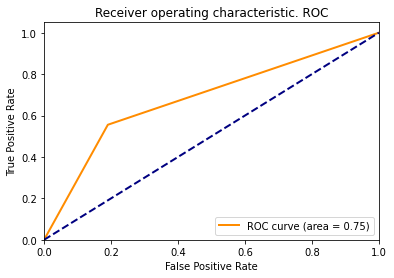

In [100]:
df9 = pd.read_csv("/content/PCA.csv")

X = df9[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"]].values
y = df9['Problema de salud'].values
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], y, random_state=455,test_size=0.2)

#DecisionTreeClassifier clasificador Gini 
clf_entropy = DecisionTreeClassifier(criterion='entropy')
#Entrenamos el modelo
clf_entropy = clf_entropy.fit(X_train, y_train)
#Predecimos
y_predic_entropy = clf_entropy.predict(X_test)

#Revisamos datos obtenidos 
matrix = confusion_matrix(y_test, y_predic_entropy)
tn, fp, fn, tp = confusion_matrix(y_test, y_predic_entropy).ravel()
print('Matriz de confusión del modelo:\n', matrix)
accuracy = accuracy_score(y_test, y_predic_entropy)
print('Accuracy del modelo:', accuracy)
f1_2 = f1_score(y_test,y_predic_entropy, average='macro')
print('F1 modelo average macro:', f1_2)
MCC= matthews_corrcoef(y_test, y_predic_entropy)
print('MCC del modelo:', MCC)

AUC=[]
AUC.append(roc_auc_score(y_test,y_predic_entropy))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predic_entropy, pos_label=1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_predic_Gini))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

#Conclusiones

Al realizar distintos tipos de algoritmos para verificar cual es el que se acerca más a un buen modelo se obtuvo que para este dataset el randomForest es la mejor.

- Accuracy de: 0.9
- F1 modelo average macro: 0.8721590909090908
- MCC: 0.7443181818181818